In [1]:
%matplotlib inline

import os  
os.chdir('../')

In [2]:
ls data/cifar-10-batches-py/

batches.meta  data_batch_2  data_batch_4  readme.html
data_batch_1  data_batch_3  data_batch_5  test_batch


In [3]:
import numpy as np
import pickle
from functools import reduce
from matplotlib import pyplot as plt

import pandas as pd

In [4]:
def load_files(input_dir):
    """Takes in an input training directory and returns 
    
        train_data, train_labels
        test_data, test_labels"""
    training_files = map(lambda x: import_image(''.join([input_dir, '/', 'data_batch_', str(x)])), range(2, 3))
    
    train_data, train_labels = reduce(lambda x, y: (np.append(x[0], y[0], axis=0), np.append(x[1], y[1], axis=0)), training_files)
    test_data, test_labels = import_image('data/cifar-10-batches-py/test_batch')
    
    return train_data, train_labels, test_data, test_labels

In [5]:
def unpickle_and_encode(file):
    with open(file, 'rb') as fo:
        dic = pickle.load(fo, encoding='bytes')
    return {str(k, 'utf-8'): v for k, v in dic.items()}

In [6]:
def import_image(path):
    raw_image_data = unpickle_and_encode(path)
    
    images, labels = raw_image_data['data'], raw_image_data['labels']
    images = images.reshape((images.shape[0], 3, 32, 32)).transpose(0, 2, 3, 1) 
    
    return images, labels

In [7]:
def plot_image(img_object, label = None):
    
    plt.title(label)
    plt.imshow(img_object)
    

In [8]:
train_data, train_labels, test_data, test_labels = load_files('data/cifar-10-batches-py')
label_encodings = unpickle_and_encode('data/cifar-10-batches-py/batches.meta')['label_names']

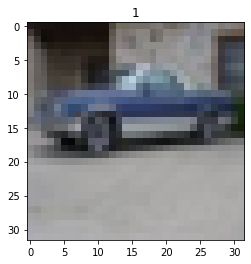

In [9]:
plot_image(train_data[0], train_labels[0])

In [9]:
import numpy as np 
import torch
import torchvision
import torchvision.transforms as transforms

In [10]:
from torch.autograd import Variable
import torch.nn as nn

import torch.nn.functional as F

class VanillaCNN(torch.nn.Module):
    
    def __init__(self, num_classes=10):
        super(VanillaCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10) 
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

In [11]:
import torch.optim as optim
from torch.utils.data import TensorDataset


def loss_and_optimizer(net, learning_rate):
    
    loss = torch.nn.CrossEntropyLoss()
    
    optimizer = optim.SGD(net.parameters(), lr=learning_rate)
    
    return loss, optimizer

In [12]:
def get_train_loader(batch_size, train_data, train_labels):
    
    dataset = TensorDataset(torch.Tensor(train_data.transpose(0,3,1,2)),
                            torch.LongTensor(train_labels))
    if batch_size is None:
        batch_size = len(train_data)
    
    return torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                        num_workers=2)


In [13]:
def train_model(net, batch_size, n_epochs, learning_rate, train_data, train_labels, test_data, test_labels):
    running_losses, validation_loss = [], []
    train_loader = get_train_loader(batch_size, train_data, train_labels)
    
    test_loader = get_train_loader(None, test_data, test_labels)
    n_batches = len(train_loader)
    loss, optimizer = loss_and_optimizer(net, learning_rate)
    
    for epoch in range(n_epochs):
        running_loss = 0
        total_train_loss = 0
        
        for i, data in enumerate(train_loader, 0):
            
            
            inputs, labels = data
           # inputs, labels = Variable(inputs), Variable(labels)
            optimizer.zero_grad()
            
            outputs = net(inputs)
            loss_size = loss(outputs, labels)
            loss_size.backward()
            optimizer.step()
            
            
            running_loss += loss_size.data.item()
            total_train_loss += loss_size.data.item()

            if i % 500 == 499: 
                print("Epoch {1}, \n \
                       Train Loss: {2} \n \
                       Validation Loss: {3}".format(str(i), running_loss/2500, validation_loss/2500))
                
                running_losses += [running_loss]
                running_loss = 0
                for inputs, labels in test_loader: 
                    val_outputs = net(inputs)
                    val_loss = loss(val_outputs, labels)
                    print('val loss is ', val_loss)
                validation_loss += [val_loss] 

                
                
    return running_losses, validation_loss
                
            
            
        
            
        
        

In [14]:
import pandas as pd 
gangsta = VanillaCNN()
losses = train_model(gangsta, 5, 10, .001, train_data, train_labels, test_data, test_labels)

TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
df = pd.DataFrame(data=losses, columns=['validation_loss']).plot(kind='line')

In [ ]:
newnew = get_train_loader(None, test_data, test_labels)

In [ ]:

import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as transforms

In [ ]:
new = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


In [22]:
ls data/

cifar-10-batches-py/  input_data.tar.gz


In [96]:
new[0]

(tensor([[[-0.5373, -0.6627, -0.6078,  ...,  0.2392,  0.1922,  0.1608],
          [-0.8745, -1.0000, -0.8588,  ..., -0.0353, -0.0667, -0.0431],
          [-0.8039, -0.8745, -0.6157,  ..., -0.0745, -0.0588, -0.1451],
          ...,
          [ 0.6314,  0.5765,  0.5529,  ...,  0.2549, -0.5608, -0.5843],
          [ 0.4118,  0.3569,  0.4588,  ...,  0.4431, -0.2392, -0.3490],
          [ 0.3882,  0.3176,  0.4039,  ...,  0.6941,  0.1843, -0.0353]],
 
         [[-0.5137, -0.6392, -0.6235,  ...,  0.0353, -0.0196, -0.0275],
          [-0.8431, -1.0000, -0.9373,  ..., -0.3098, -0.3490, -0.3176],
          [-0.8118, -0.9451, -0.7882,  ..., -0.3412, -0.3412, -0.4275],
          ...,
          [ 0.3333,  0.2000,  0.2627,  ...,  0.0431, -0.7569, -0.7333],
          [ 0.0902, -0.0353,  0.1294,  ...,  0.1608, -0.5137, -0.5843],
          [ 0.1294,  0.0118,  0.1137,  ...,  0.4431, -0.0745, -0.2784]],
 
         [[-0.5059, -0.6471, -0.6627,  ..., -0.1529, -0.2000, -0.1922],
          [-0.8431, -1.0000,

In [45]:
dataset[0][0].shape

torch.Size([3, 32, 32])

In [46]:
train_data.transpose(0, 3, 1, 2).shape

(10000, 3, 32, 32)

In [81]:
train_data.shape

(10000, 32, 32, 3)